In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()




In [96]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(
    'fcc-forum-pageviews.csv', index_col=0, parse_dates=True)
df.head(5)


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [97]:
# Clean data
df = df[
        (df["value"] > df["value"].quantile(0.025)) &
        (df["value"] < df["value"].quantile(0.975))
        ]

In [98]:
def draw_line_plot():
    # Draw line plot
    fig, axes = plt.subplots(figsize=(12, 6))
    axes.plot(df)
    axes.set_xlabel('Date')
    axes.set_ylabel('Page Views')
    axes.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.show()

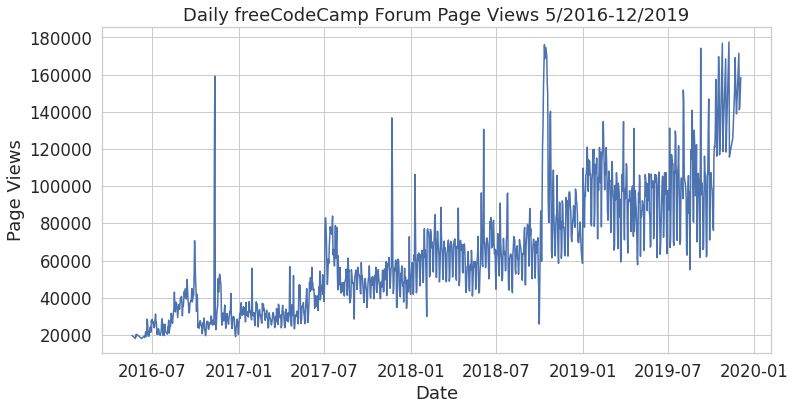

In [99]:
draw_line_plot()

In [104]:
monthly_average = df.resample('M').mean()
monthly_average.head()

,value
date,
2016-05-31,19432.400000
2016-06-30,21875.105263
2016-07-31,24109.678571
2016-08-31,31049.193548
2016-09-30,41476.866667


In [113]:
df_bar = df.groupby([(df.index.year),(df.index.month)]).mean()
df_bar.head()

value
date date              
2016 5     19432.400000
     6     21875.105263
     7     24109.678571
     8     31049.193548
     9     41476.866667

In [118]:
def draw_bar_plot():
    # Draw bar plot
    fig = df_bar.unstack().plot(kind='bar',figsize=(12, 10),width=0.6).figure
    plt.legend(labels=("January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"))
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.title("Average Page Views per Year")
    # axes.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.show()

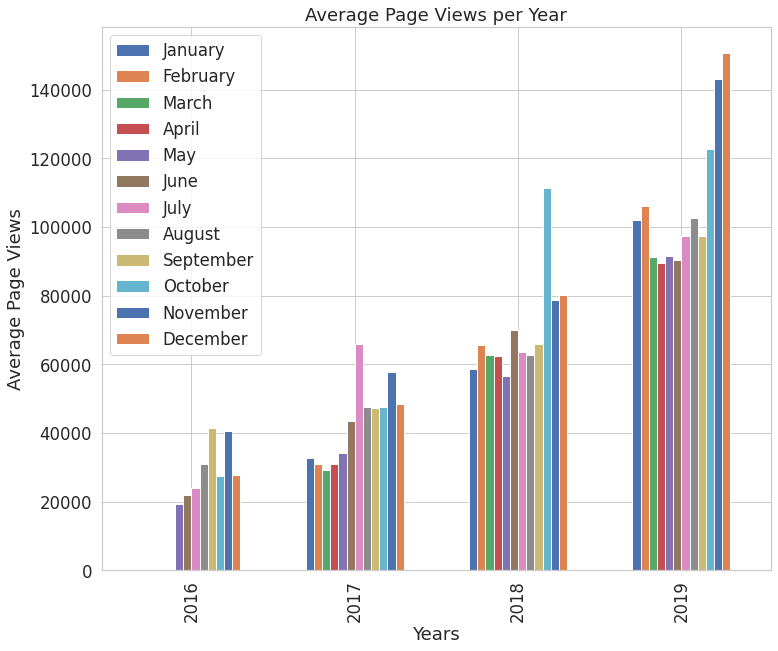

In [119]:
draw_bar_plot()

In [159]:
def draw_box_plot():
    df_2 = df.copy()
    df_2.reset_index(inplace=True)
    df_2['year'] = [d.year for d in df_2.date]
    df_2['month'] = [d.strftime('%b') for d in df_2.date]
    corr_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    # Draw the box plot

    fig, (ax, ax1) = plt.subplots(1,2)
    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax = sns.boxplot(x = df_2['year'], y=df_2['value'], ax=ax)
    ax.set(xlabel='Year',
        ylabel='Page Views',
        title='Year-wise Box Plot (Trend)')


    ax1 = sns.boxplot(x = df_2['month'], y=df_2['value'], ax=ax1, order=corr_order)
    ax1.set(xlabel='Month',
        ylabel='Page Views',
        title='Month-wise Box Plot (Seasonality)')

    plt.show()


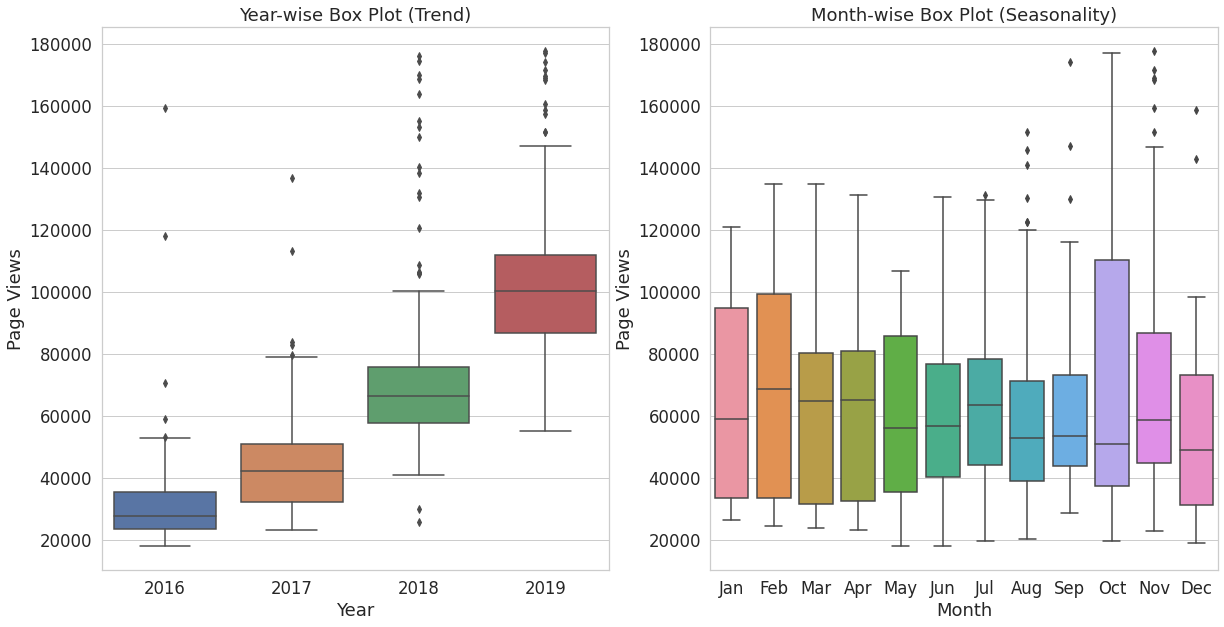

In [160]:
draw_box_plot()

In [121]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
